<h1><center><b style = 'colour: Blue'> Exploratory Data Analysis on ArXiv Dataset </b></center></h1>

Importing Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ikedijacobs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Dataset

#### Load the dataset

In [3]:
# load the dataset
data = pd.read_json('data_econGN_2020.json', lines = True)
data.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,pdf_link,body
0,1506.07368,Stefan Rass,Stefan Rass,On Game-Theoretic Risk Management (Part One) -...,None,None,None,NaN,econ.GN math.ST q-fin.EC stat.AP stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,Optimal behavior in (competitive) situation ...,"[{'version': 'v1', 'created': 'Wed, 24 Jun 201...",1587945600000,"[[Rass, Stefan, ]]",https://arxiv.org/pdf/1506.07368.pdf,0\n2\n0\n2\n\nr\np\nA\n4\n2\n\n]\n\nN\nG\n.\nn...
1,1511.08591,Stefan Rass,Stefan Rass,On Game-Theoretic Risk Management (Part Two) -...,None,None,None,NaN,econ.GN cs.GT math.ST q-fin.EC q-fin.RM stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,The game-theoretic risk management framework...,"[{'version': 'v1', 'created': 'Fri, 27 Nov 201...",1586476800000,"[[Rass, Stefan, ]]",https://arxiv.org/pdf/1511.08591.pdf,0\n2\n0\n2\n\nr\np\nA\n9\n\n]\n\nN\nG\n.\nn\no...
2,1705.05943,Isaac Sonin M,Isaac M. Sonin and Konstantin Sonin,Banks as Tanks: A Continuous-Time Model of Fin...,None,None,None,NaN,econ.GN q-fin.EC,http://arxiv.org/licenses/nonexclusive-distrib...,We present a simple continuous-time model of...,"[{'version': 'v1', 'created': 'Tue, 16 May 201...",1596153600000,"[[Sonin, Isaac M., ], [Sonin, Konstantin, ]]",https://arxiv.org/pdf/1705.05943.pdf,Banks as Tanks: A Continuous-Time Model of\n\n...
3,1807.09424,Andres Gomez-Lievano,"Andres Gomez-Lievano, Vladislav Vysotsky, Jose...",Artificial Increasing Returns to Scale and the...,"29 pages, 9 figures, 2 tables. Environment and...",None,10.1177/2399808320942366,NaN,econ.GN physics.soc-ph q-fin.EC,http://arxiv.org/licenses/nonexclusive-distrib...,We show how increasing returns to scale in u...,"[{'version': 'v1', 'created': 'Wed, 25 Jul 201...",1594944000000,"[[Gomez-Lievano, Andres, ], [Vysotsky, Vladisl...",https://arxiv.org/pdf/1807.09424.pdf,Artificial Increasing Returns to Scale and \nt...
4,1808.08717,Ashwin Seshadri,Ashwin K Seshadri,Economics of carbon-dioxide abatement under an...,None,None,None,NaN,econ.GN q-fin.EC,http://arxiv.org/licenses/nonexclusive-distrib...,The fossil-fuel induced contribution to furt...,"[{'version': 'v1', 'created': 'Mon, 27 Aug 201...",1591660800000,"[[Seshadri, Ashwin K, ]]",https://arxiv.org/pdf/1808.08717.pdf,0\n2\n0\n2\n\nn\nu\nJ\n\n7\n\n]\n\nN\nG\n.\nn\...


#### Dataset summary

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              366 non-null    float64
 1   submitter       366 non-null    object 
 2   authors         366 non-null    object 
 3   title           366 non-null    object 
 4   comments        149 non-null    object 
 5   journal-ref     53 non-null     object 
 6   doi             71 non-null     object 
 7   report-no       0 non-null      float64
 8   categories      366 non-null    object 
 9   license         366 non-null    object 
 10  abstract        366 non-null    object 
 11  versions        366 non-null    object 
 12  update_date     366 non-null    int64  
 13  authors_parsed  366 non-null    object 
 14  pdf_link        366 non-null    object 
 15  body            366 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 45.9+ KB


In [5]:
data.describe()

,id,report-no,update_date
count,366.000000,0.0,3.660000e+02
mean,1986.935965,NaN,1.596731e+12
std,59.106528,NaN,9.313042e+09
min,1506.073680,NaN,1.577837e+12
25%,2002.061295,NaN,1.589760e+12
50%,2007.071735,NaN,1.598702e+12
75%,2010.145165,NaN,1.605096e+12
max,2012.138160,NaN,1.609200e+12


----------------

# Exploration

## Abstract Length

In [6]:
# get the length of abstract
def get_abstract_length(x):
    return len(x.split())

In [7]:

# create a new column for abstract length
data['abstract_length'] = data['abstract'].apply(get_abstract_length)

In [8]:
# view the dataframe
data.head(3)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,pdf_link,body,abstract_length
0,1506.07368,Stefan Rass,Stefan Rass,On Game-Theoretic Risk Management (Part One) -...,None,None,None,NaN,econ.GN math.ST q-fin.EC stat.AP stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,Optimal behavior in (competitive) situation ...,"[{'version': 'v1', 'created': 'Wed, 24 Jun 201...",1587945600000,"[[Rass, Stefan, ]]",https://arxiv.org/pdf/1506.07368.pdf,0\n2\n0\n2\n\nr\np\nA\n4\n2\n\n]\n\nN\nG\n.\nn...,246
1,1511.08591,Stefan Rass,Stefan Rass,On Game-Theoretic Risk Management (Part Two) -...,None,None,None,NaN,econ.GN cs.GT math.ST q-fin.EC q-fin.RM stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,The game-theoretic risk management framework...,"[{'version': 'v1', 'created': 'Fri, 27 Nov 201...",1586476800000,"[[Rass, Stefan, ]]",https://arxiv.org/pdf/1511.08591.pdf,0\n2\n0\n2\n\nr\np\nA\n9\n\n]\n\nN\nG\n.\nn\no...,191
2,1705.05943,Isaac Sonin M,Isaac M. Sonin and Konstantin Sonin,Banks as Tanks: A Continuous-Time Model of Fin...,None,None,None,NaN,econ.GN q-fin.EC,http://arxiv.org/licenses/nonexclusive-distrib...,We present a simple continuous-time model of...,"[{'version': 'v1', 'created': 'Tue, 16 May 201...",1596153600000,"[[Sonin, Isaac M., ], [Sonin, Konstantin, ]]",https://arxiv.org/pdf/1705.05943.pdf,Banks as Tanks: A Continuous-Time Model of\n\n...,126


In [9]:
# average length of an abstract
print(f'Abstract mean lenght {data['abstract_length'].mean()}')
print(f'Abstract median length {data['abstract_length'].median()}')
print(f'Abstract max length {data['abstract_length'].max()}')
print(f'Abstract standard deviation {data['abstract_length'].std()}')

Abstract mean lenght 161.29234972677597
Abstract median length 156.0
Abstract max length 312
Abstract standard deviation 57.573008291896


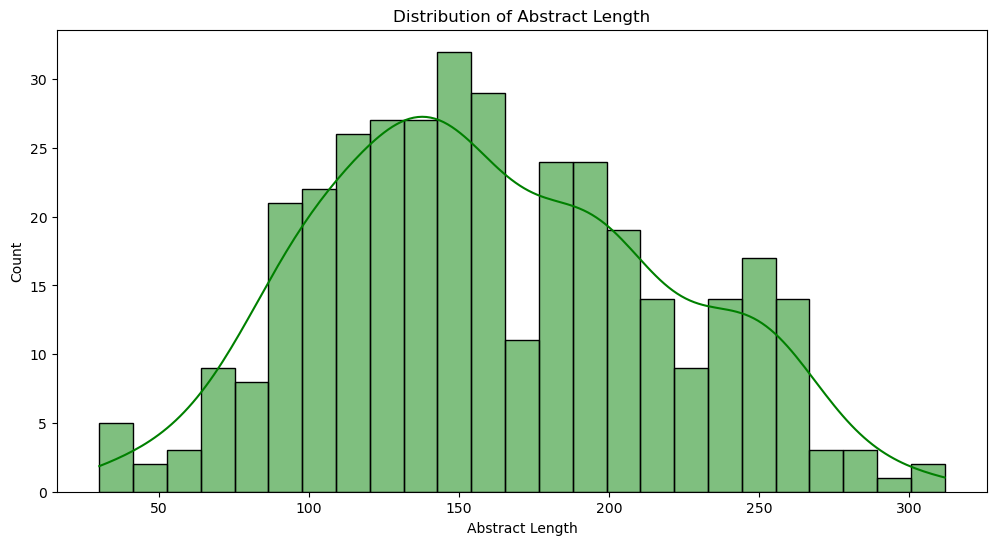

In [10]:
# plot the distribution of abstract length
plt.figure(figsize = (12, 6))
sns.histplot(data = data, x = 'abstract_length', bins = 25, kde = True, color = 'green')
plt.title('Distribution of Abstract Length')
plt.xlabel('Abstract Length')
plt.ylabel('Count')
plt.show()

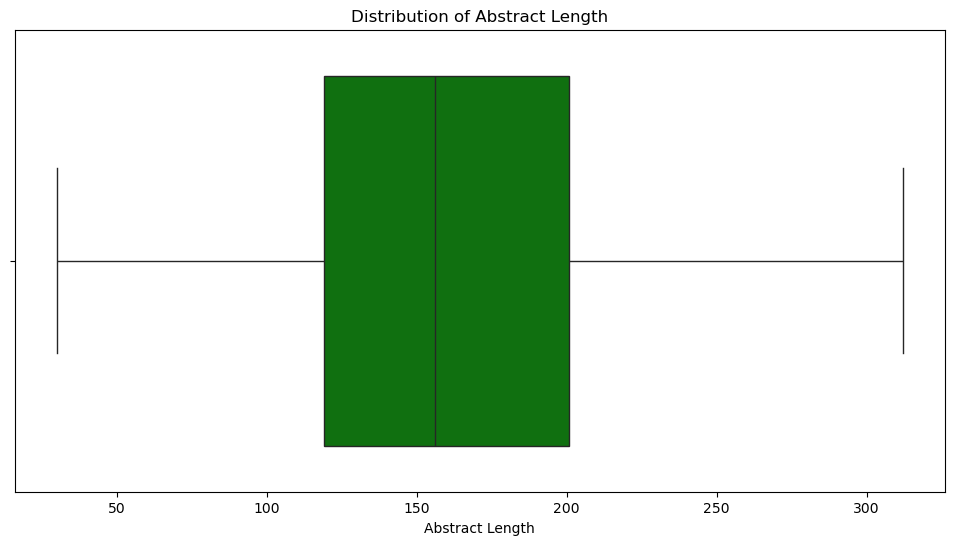

In [11]:
# box plot for the abstract length
plt.figure(figsize = (12, 6))
sns.boxplot(data = data, x = 'abstract_length', color = 'green')
plt.title('Distribution of Abstract Length')
plt.xlabel('Abstract Length')
# plt.ylabel('Length Count')
plt.show()

Jacobs Notes: We can see here that the length of an abstract is about 120 to 200 words, although there are a few that go above and beyond. This gives us an understanding of what is required and what is expected in the general style of summarization.

## Title Length

In [12]:
# get the length of title
def get_title_length(x):
    return len(x.split())

In [13]:
# create a new column for abstract length
data['title_length'] = data['title'].apply(get_title_length)

In [14]:
# view the dataframe
data.head(3)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,pdf_link,body,abstract_length,title_length
0,1506.07368,Stefan Rass,Stefan Rass,On Game-Theoretic Risk Management (Part One) -...,None,None,None,NaN,econ.GN math.ST q-fin.EC stat.AP stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,Optimal behavior in (competitive) situation ...,"[{'version': 'v1', 'created': 'Wed, 24 Jun 201...",1587945600000,"[[Rass, Stefan, ]]",https://arxiv.org/pdf/1506.07368.pdf,0\n2\n0\n2\n\nr\np\nA\n4\n2\n\n]\n\nN\nG\n.\nn...,246,17
1,1511.08591,Stefan Rass,Stefan Rass,On Game-Theoretic Risk Management (Part Two) -...,None,None,None,NaN,econ.GN cs.GT math.ST q-fin.EC q-fin.RM stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,The game-theoretic risk management framework...,"[{'version': 'v1', 'created': 'Fri, 27 Nov 201...",1586476800000,"[[Rass, Stefan, ]]",https://arxiv.org/pdf/1511.08591.pdf,0\n2\n0\n2\n\nr\np\nA\n9\n\n]\n\nN\nG\n.\nn\no...,191,17
2,1705.05943,Isaac Sonin M,Isaac M. Sonin and Konstantin Sonin,Banks as Tanks: A Continuous-Time Model of Fin...,None,None,None,NaN,econ.GN q-fin.EC,http://arxiv.org/licenses/nonexclusive-distrib...,We present a simple continuous-time model of...,"[{'version': 'v1', 'created': 'Tue, 16 May 201...",1596153600000,"[[Sonin, Isaac M., ], [Sonin, Konstantin, ]]",https://arxiv.org/pdf/1705.05943.pdf,Banks as Tanks: A Continuous-Time Model of\n\n...,126,9


In [15]:
# Summary statistics for title length
print(f'Title mean length {data['title_length'].mean()}')
print(f'Title median length {data['title_length'].median()}')
print(f'Title max length {data['title_length'].max()}')
print(f'Title standard deviation {data['title_length'].std()}')

Title mean length 11.472677595628415
Title median length 11.0
Title max length 31
Title standard deviation 4.442394385838821


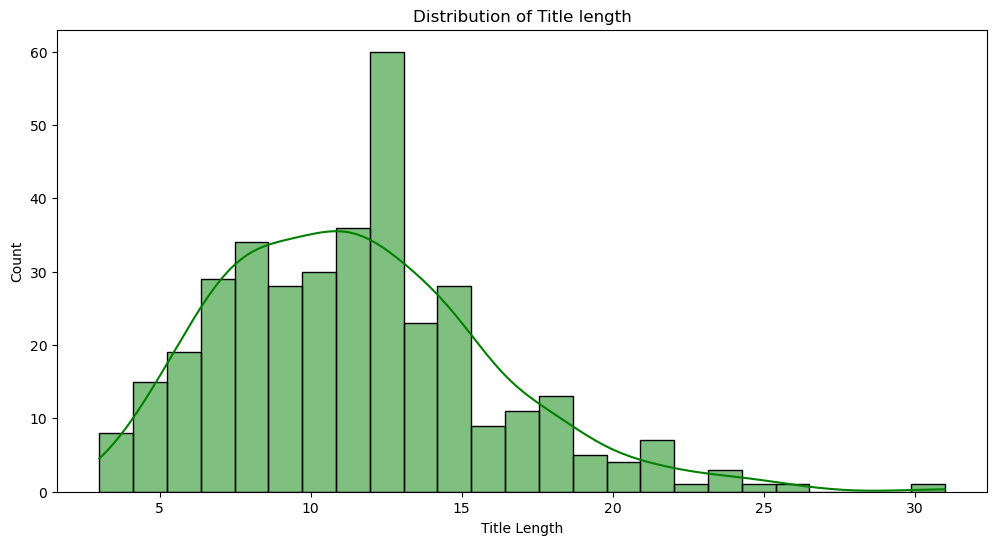

In [16]:
# plot of the distribution of title length
plt.figure(figsize = (12, 6))
sns.histplot(data = data, x = 'title_length', bins = 25, kde = True, color = 'green')
plt.title('Distribution of Title length')
plt.xlabel('Title Length')
plt.ylabel('Count')
plt.show()

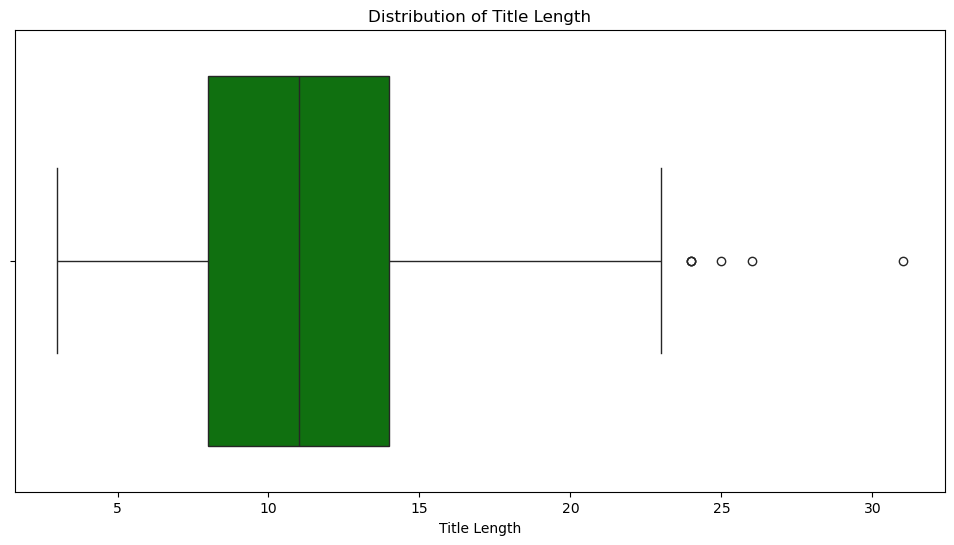

In [17]:
# box plot for the abstract length
plt.figure(figsize = (12, 6))
sns.boxplot(data = data, x = 'title_length', color = 'green')
plt.title('Distribution of Title Length')
plt.xlabel('Title Length')
# plt.ylabel('Length Count')
plt.show()

Jacobs Note: Most titles have about 11 words it is quite common for it to go above or below with a standard deviation of 4 words. There are some outliers with about above 24 words but they are quite few

## Body Length

In [18]:
# get the length of body
def get_body_length(x):
    return len(x.split())

In [19]:
# create a new column for body length
data['body_length'] = data['body'].apply(get_body_length)

In [20]:
# view the dataframe
data.head(3)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,pdf_link,body,abstract_length,title_length,body_length
0,1506.07368,Stefan Rass,Stefan Rass,On Game-Theoretic Risk Management (Part One) -...,None,None,None,NaN,econ.GN math.ST q-fin.EC stat.AP stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,Optimal behavior in (competitive) situation ...,"[{'version': 'v1', 'created': 'Wed, 24 Jun 201...",1587945600000,"[[Rass, Stefan, ]]",https://arxiv.org/pdf/1506.07368.pdf,0\n2\n0\n2\n\nr\np\nA\n4\n2\n\n]\n\nN\nG\n.\nn...,246,17,17645
1,1511.08591,Stefan Rass,Stefan Rass,On Game-Theoretic Risk Management (Part Two) -...,None,None,None,NaN,econ.GN cs.GT math.ST q-fin.EC q-fin.RM stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,The game-theoretic risk management framework...,"[{'version': 'v1', 'created': 'Fri, 27 Nov 201...",1586476800000,"[[Rass, Stefan, ]]",https://arxiv.org/pdf/1511.08591.pdf,0\n2\n0\n2\n\nr\np\nA\n9\n\n]\n\nN\nG\n.\nn\no...,191,17,12741
2,1705.05943,Isaac Sonin M,Isaac M. Sonin and Konstantin Sonin,Banks as Tanks: A Continuous-Time Model of Fin...,None,None,None,NaN,econ.GN q-fin.EC,http://arxiv.org/licenses/nonexclusive-distrib...,We present a simple continuous-time model of...,"[{'version': 'v1', 'created': 'Tue, 16 May 201...",1596153600000,"[[Sonin, Isaac M., ], [Sonin, Konstantin, ]]",https://arxiv.org/pdf/1705.05943.pdf,Banks as Tanks: A Continuous-Time Model of\n\n...,126,9,16357


In [21]:
# Summary statistics for body length
print(f'Body mean length {data['body_length'].mean()}')
print(f'Body median length {data['body_length'].median()}')
print(f'Body max length {data['body_length'].max()}')
print(f'Body standard deviation {data['body_length'].std()}')

Body mean length 10438.554644808743
Body median length 8431.0
Body max length 70637
Body standard deviation 7637.248875392042


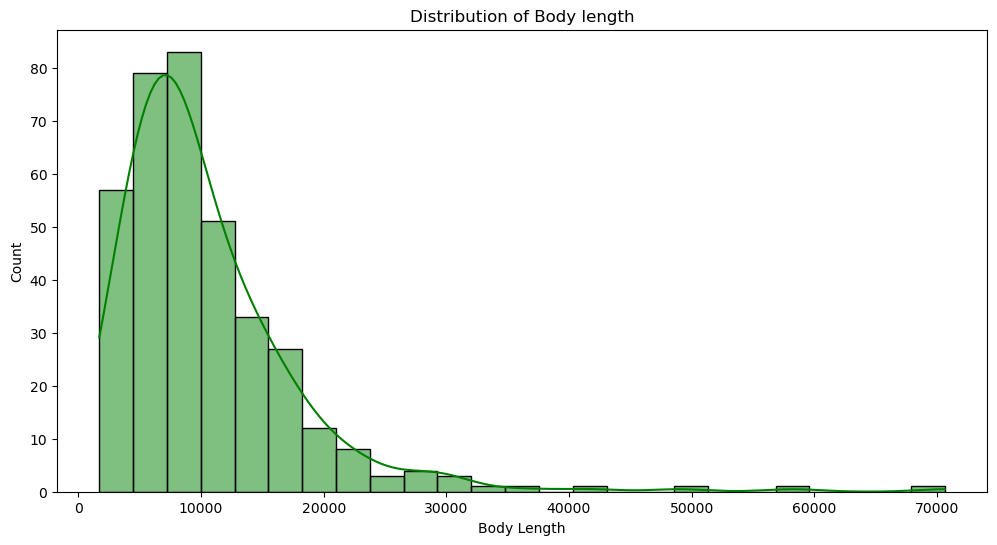

In [22]:
# plot of the distribution of body length
plt.figure(figsize = (12, 6))
sns.histplot(data = data, x = 'body_length', bins = 25, kde = True, color = 'green')
plt.title('Distribution of Body length')
plt.xlabel('Body Length')
plt.ylabel('Count')
plt.show()

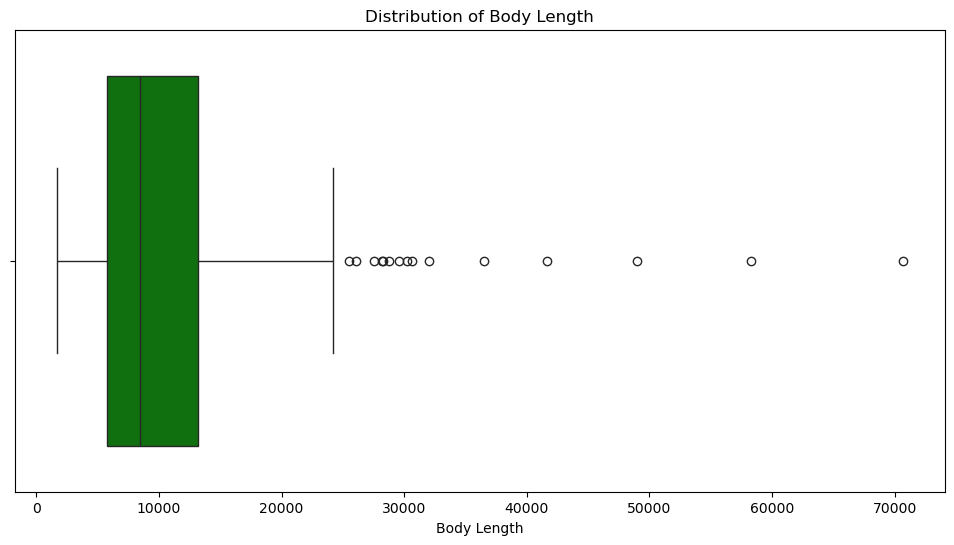

In [23]:
# box plot for the body length
plt.figure(figsize = (12, 6))
sns.boxplot(data = data, x = 'body_length', color = 'green')
plt.title('Distribution of Body Length')
plt.xlabel('Body Length')
# plt.ylabel('Length Count')
plt.show()

--------------------

# Correlation Analyses

In [24]:
# correlation between the title length, abstract length, body length
data[['title_length', 'abstract_length', 'body_length']].corr()

,title_length,abstract_length,body_length
title_length,1.000000,0.246959,-0.082741
abstract_length,0.246959,1.000000,0.138746
body_length,-0.082741,0.138746,1.000000


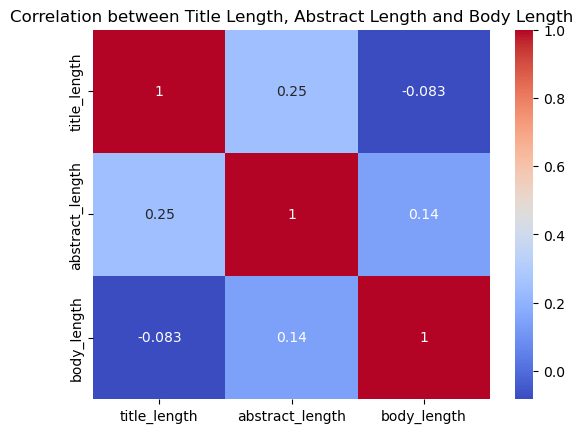

In [25]:
# correlation plot between the title length, abstract length, body length
sns.heatmap(data[['title_length', 'abstract_length', 'body_length']].corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation between Title Length, Abstract Length and Body Length')
plt.show()

<Figure size 1200x600 with 0 Axes>

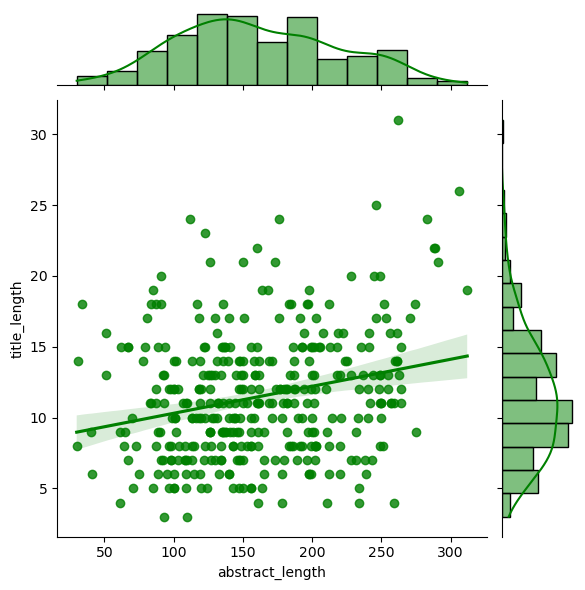

In [26]:
# jointplot between the title length and the abstract length
plt.figure(figsize = (12, 6))
sns.jointplot(data = data, x = 'abstract_length', y = 'title_length', kind = 'reg', color = 'green')
plt.show()

<Figure size 1200x600 with 0 Axes>

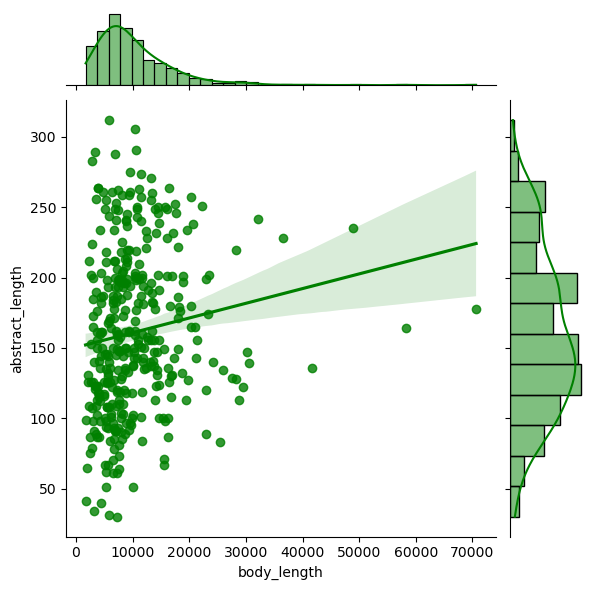

In [27]:
# jointplot between the abstract length and the body length
plt.figure(figsize= (12, 6))
sns.jointplot(data = data, x = 'body_length', y = 'abstract_length', kind = 'reg', color = 'green')
plt.show()

Jacobs Note: There is little to no correlation between the body length to the abstract length, in other words we cannot say that scientific papers with long text usually have longer abstract.

-------------------------------

# Text Length and Structure Analysis

In [28]:
# Search for ratios of abstract length to body length
data['abstract_body_ratio'] = data['abstract_length'] / data['body_length']

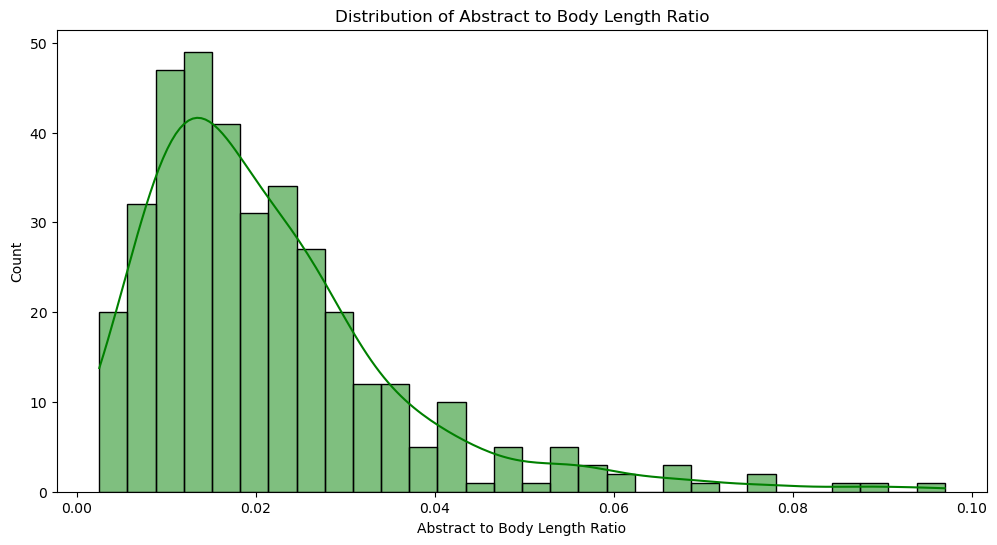

In [29]:
# Histogram plot of the ratio
plt.figure(figsize = (12, 6))
sns.histplot(data = data, x = 'abstract_body_ratio', bins = 30, kde = True, color = 'green')
plt.title('Distribution of Abstract to Body Length Ratio')
plt.xlabel('Abstract to Body Length Ratio')
plt.show()

Jacobs Note: We see that the ratio of abstract length to body text length is right skewed but it is quite common for the abstract to be about 4% and lower of the entire body text length.

## Sentence Count Distribution

In [30]:
# count of sentence in abstract
def get_abstract_sentence_count(x):
    tk = nltk.sent_tokenize(x, language = 'english')
    return len(tk)

# count of sentence in text body
def get_body_sentence_count(x):
    tk = nltk.sent_tokenize(x)
    return len(tk)

In [31]:
nltk.__version__

'3.9.1'

In [32]:
type(data['abstract'][0])

str

In [33]:
data['abstract'][0]

"  Optimal behavior in (competitive) situation is traditionally determined with\nthe help of utility functions that measure the payoff of different actions.\nGiven an ordering on the space of revenues (payoffs), the classical axiomatic\napproach of von Neumann and Morgenstern establishes the existence of suitable\nutility functions, and yields to game-theory as the most prominent\nmaterialization of a theory to determine optimal behavior. Although this\nappears to be a most natural approach to risk management too, applications in\ncritical infrastructures often violate the implicit assumption of actions\nleading to deterministic consequences. In that sense, the gameplay in a\ncritical infrastructure risk control competition is intrinsically random in the\nsense of actions having uncertain consequences. Mathematically, this takes us\nto utility functions that are probability-distribution-valued, in which case we\nloose the canonic (in fact every possible) ordering on the space of payoff

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ikedijacobs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
import nltk

nltk.data.path.append('/Users/ikedijacobs/nltk_data')

# Now try your function again
def get_abstract_sentence_count(x):
    tk = nltk.sent_tokenize(x, language='english')
    return len(tk)

print(get_abstract_sentence_count("This is a test sentence. Here is another one!"))

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/ikedijacobs/nltk_data'
    - '/opt/anaconda3/nltk_data'
    - '/opt/anaconda3/share/nltk_data'
    - '/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/Users/ikedijacobs/nltk_data'
**********************************************************************


In [40]:
import os
import nltk

for path in nltk.data.path:
    punkt_path = os.path.join(path, "tokenizers", "punkt")
    if os.path.exists(punkt_path):
        print(f"'punkt' found in: {punkt_path}")
        break
else:
    print("'punkt' is NOT found in any of the listed NLTK data paths.")

'punkt' found in: /Users/ikedijacobs/nltk_data/tokenizers/punkt


In [36]:
get_abstract_sentence_count(data['abstract'][0])

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/ikedijacobs/nltk_data'
    - '/opt/anaconda3/nltk_data'
    - '/opt/anaconda3/share/nltk_data'
    - '/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
# create a new column for abstract sentence count
data['abstract_sentence_count'] = data['abstract'].apply(get_abstract_sentence_count)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ikedijacobs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/ikedijacobs/nltk_data'
    - '/opt/anaconda3/nltk_data'
    - '/opt/anaconda3/share/nltk_data'
    - '/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [37]:
print(nltk.data.path)

['/Users/ikedijacobs/nltk_data', '/opt/anaconda3/nltk_data', '/opt/anaconda3/share/nltk_data', '/opt/anaconda3/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [39]:
import nltk
nltk.download('punkt', download_dir='/usr/local/share/nltk_data')  # Change path if needed
nltk.data.path.append('/usr/local/share/nltk_data')

[nltk_data] Downloading package punkt to /usr/local/share/nltk_data...


PermissionError: [Errno 13] Permission denied: '/usr/local/share'

# Others